In [1]:
import sys
import os

project_path = os.path.dirname(os.path.abspath('./'))

if project_path not in sys.path:
    sys.path.append(project_path)

In [6]:
import pandas as pd

In [10]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from crome.config import config
from crome.dashboard.database.manager import fetch_and_clean_data

In [11]:
mpl.rcParams['figure.dpi'] = 300

In [3]:
PROJECT_PATH = config['DEFAULT']['project_path']

In [8]:
incidents_df = pd.read_json('{}/data/processed/incidents.json'.format(PROJECT_PATH), orient='table')

In [13]:
incidents_df.head()

,nfd_id,waze_id,distance,delta_time
0,13891,9809,22.408874,3.058117
1,13891,9810,23.073981,0.374783
2,13892,9773,23.155337,7.937450
3,13892,9780,0.055376,-5.429217
4,13892,9781,0.068110,-11.145883


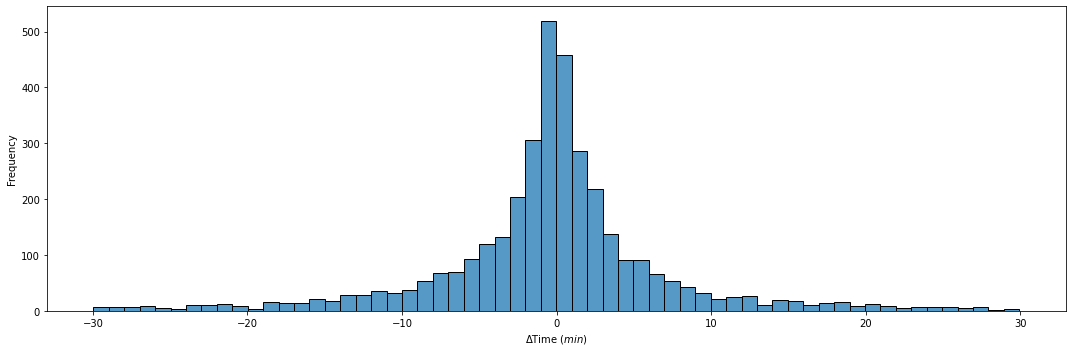

In [26]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.histplot(x='delta_time', bins=60, data=incidents_df.groupby('nfd_id').agg(lambda s: s[s.abs().idxmin()]), ax=ax)

ax.set_ylabel('Frequency')

ax.set_xlabel('$\Delta$Time ($min$)')

plt.tight_layout()

plt.show()

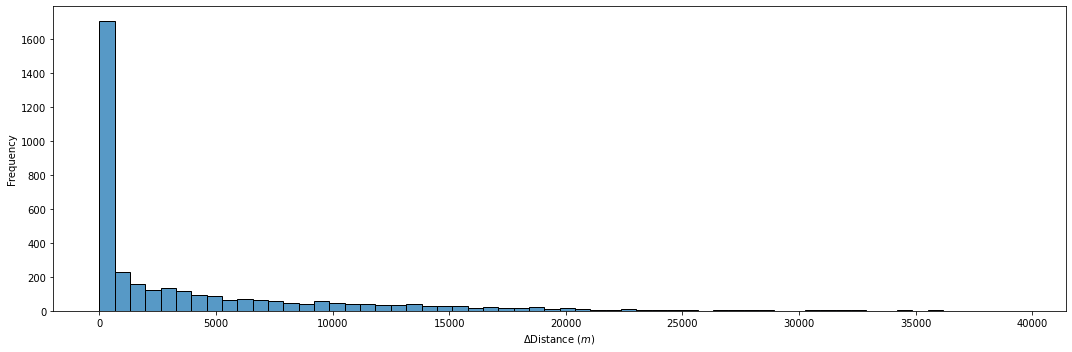

In [28]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.histplot(x='distance', bins=60, data=incidents_df.groupby('nfd_id').agg(lambda s: 1000 *s[s.abs().idxmin()]), ax=ax)

ax.set_ylabel('Frequency')

ax.set_xlabel('$\Delta$Distance ($m$)')

plt.tight_layout()

plt.show()